In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [2]:
#reading the data set

In [3]:
pd.read_csv("pima-indians-diabetes.csv")

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [6]:
df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [7]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

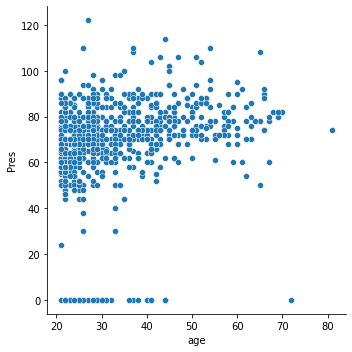

In [25]:
sns.relplot(x='age',y='Pres',data=df)

<AxesSubplot:xlabel='class', ylabel='count'>

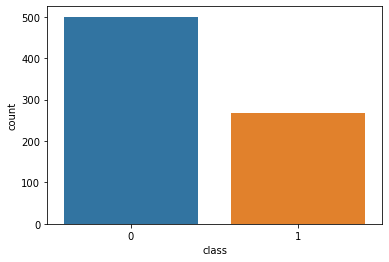

In [26]:
sns.countplot(x='class',data=df)

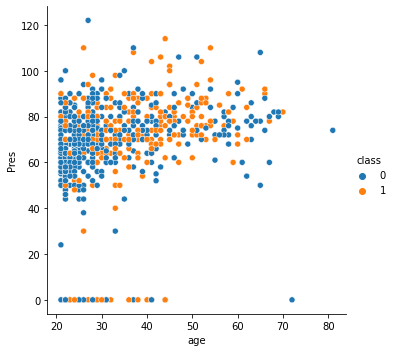

In [29]:
sns.relplot(x='age',y='Pres',hue="class",data=df)

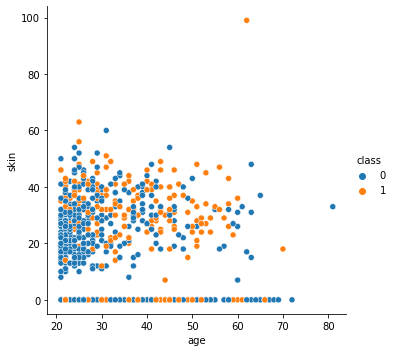

In [31]:
sns.relplot(x='age',y='skin',hue="class",data=df)

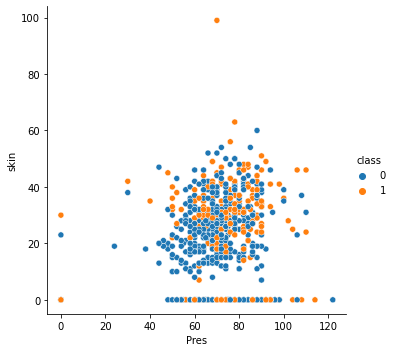

In [32]:
sns.relplot(x='Pres',y='skin',hue="class",data=df)

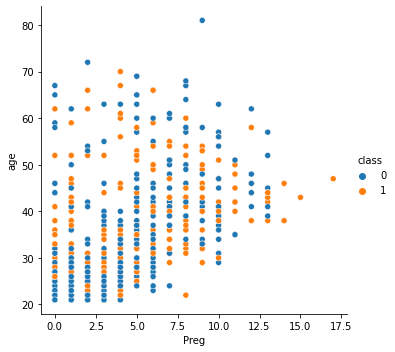

In [33]:
sns.relplot(x='Preg',y='age',hue='class',data=df)

In [34]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [35]:
x=df.drop(["class"],axis=1)

In [36]:
y=df["class"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [38]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pre=model.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

0.7835497835497836

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       147
           1       0.76      0.60      0.67        84

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pre)

array([[131,  16],
       [ 34,  50]], dtype=int64)

<AxesSubplot:>

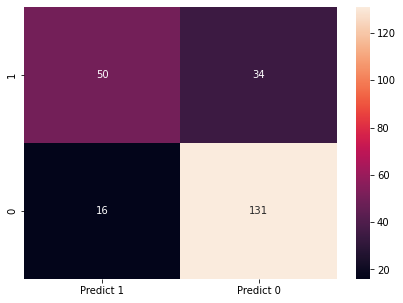

In [44]:
cm=metrics.confusion_matrix(y_test, pre, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')